# IMDb top 1000 movies dataset analysis
This notebook performs exploratory data analysis on the IMDb top 1000 movies dataset from kaggle to gain insights from it.

### Set up

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Config
sns.set_style("whitegrid") #makes plots look nicer
plt.rcParams["figure.figsize"] = (10, 6) # sets plot size

### Data loading and overview

In [3]:
df = pd.read_csv('../data/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
shape_tuple = df.shape
print(f"The dataframe rows and columns are {shape_tuple[0]} and {shape_tuple[1]} respectively")

The dataframe rows and columns are 1000 and 16 respectively


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


### Data Cleaning

The Poster_Link column doesn't look very relevant to this EDA. So let's drop it to reduce clutter.

In [6]:
df = df.drop(columns=['Poster_Link'])

Now the Release Year, Runtime and Gross columns are objects, but they should be of numeric. Lets fix it.

In [7]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  999 non-null    float64
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          831 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 117.3+ KB


#### Lets fix non-null.

first lets fix non null of release year column

In [9]:
df[df['Released_Year'].isnull()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,NaN,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


Lets add release year of this missing value movie by finding actual release year from google search

In [10]:
df['Released_Year'] = df['Released_Year'].fillna(1995)
df['Released_Year'] = df['Released_Year'].astype(int)

Now lets fix the certificates column by replacing missing values with 'Unrated'

In [11]:
df['Certificate'] = df['Certificate'].fillna('Unrated')

Now lets deal with the null values in metascore column. since its numeric type, lets visualize the distribution before deciding what to do

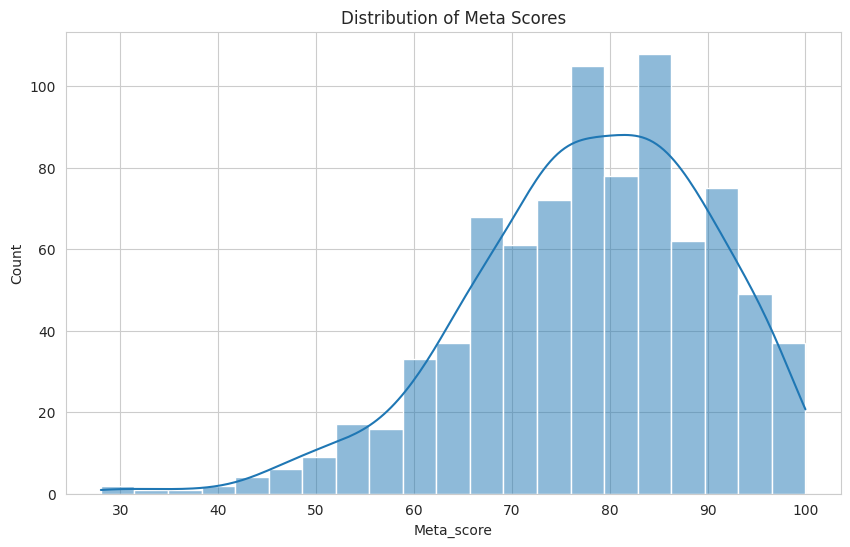

In [12]:
sns.histplot(df['Meta_score'], kde=True)
plt.title('Distribution of Meta Scores')
plt.show()

It doesnt look too symmetric with the tail on left side being longer than the right side. to avoid lower scores
on the left side dragging the mean down, we use median to replace missing values.

In [13]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())

Now only remaining column with missing values is gross. It is an important column. Also mean or median may not correctly represent the gross revenue of movies since movies in this are imdb top 1000 and revenue of such movies can vary a lot. So it maybe better to drop rows with missing gross value entirely
But before I do this, lets visualize the gross distribution to confirm our hypothesis

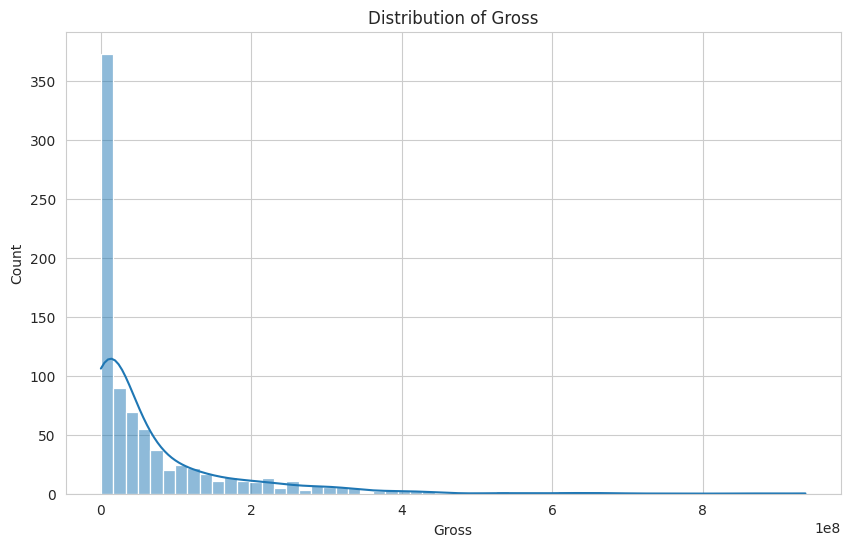

In [14]:
sns.histplot(df['Gross'], kde=True)
plt.title('Distribution of Gross')
plt.show()

Hypothesis is closer to truth according to this graph. For example, many movies earn moderate while some earn huge amount. so lets drop rows with missing gross

In [15]:
df = df.dropna(subset=['Gross'])

Lets reset the index because we just dropped some rows

In [16]:
df = df.reset_index(drop=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   831 non-null    object 
 1   Released_Year  831 non-null    int64  
 2   Certificate    831 non-null    object 
 3   Runtime        831 non-null    int64  
 4   Genre          831 non-null    object 
 5   IMDB_Rating    831 non-null    float64
 6   Overview       831 non-null    object 
 7   Meta_score     831 non-null    float64
 8   Director       831 non-null    object 
 9   Star1          831 non-null    object 
 10  Star2          831 non-null    object 
 11  Star3          831 non-null    object 
 12  Star4          831 non-null    object 
 13  No_of_Votes    831 non-null    int64  
 14  Gross          831 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 97.5+ KB


It looks clean

Now lets save the df to a cleaned csv file

In [18]:
df.to_csv('../data/cleaned_imdb_top_1000.csv', index=False)

### Exploratory Data Analysis

Lets start the EDA by describing the cleaned dataset

In [19]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,831.000000,831.000000,831.000000,831.000000,8.310000e+02,8.310000e+02
mean,1993.919374,124.078219,7.946931,77.610108,3.152499e+05,6.803475e+07
std,21.135068,27.501455,0.283204,11.877471,3.436443e+05,1.097500e+08
min,1921.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1984.000000,104.000000,7.700000,71.000000,7.143000e+04,3.253559e+06
50%,2000.000000,120.000000,7.900000,79.000000,1.867340e+05,2.353089e+07
75%,2010.000000,138.000000,8.100000,85.500000,4.457210e+05,8.075089e+07
max,2019.000000,242.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


Imdb rating range from 7.6 to 9.3. Not much variance in this, which is expected of top 1000 imdb movies

Runtime average is 124 minute ranging from 45 to 242 minutes

Most interesting is Gross column. Minimum is only 1,305 while maximum is over 9000 million. Median and mean have high difference between eachother. It looks very right skewed and maybe due to few big blockbusters. Further investigation required

#### Visualization

Now lets visualize distribution of each of imdb rating, runtime and gross one by one in the cleaned dataset

Lets start with imdb rating

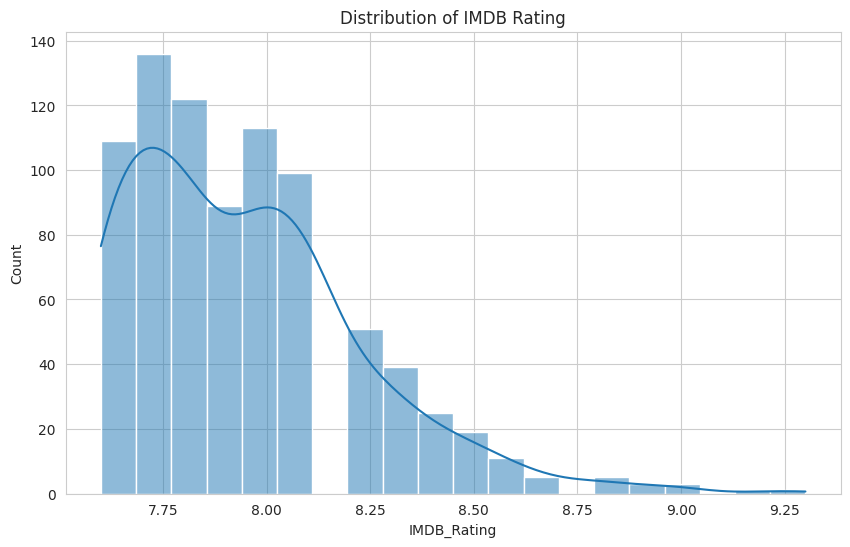

In [20]:
sns.histplot(df['IMDB_Rating'], kde=True)
plt.title('Distribution of IMDB Rating')
plt.show()

Many of the movies in the dataset are mostly appears to be in the 7.6 to 8.2 range. It appears to be exponentially harder for movies to score higher and higher rating above rating of 8.25. Only very few movies score above 9

Now Runtime histogram

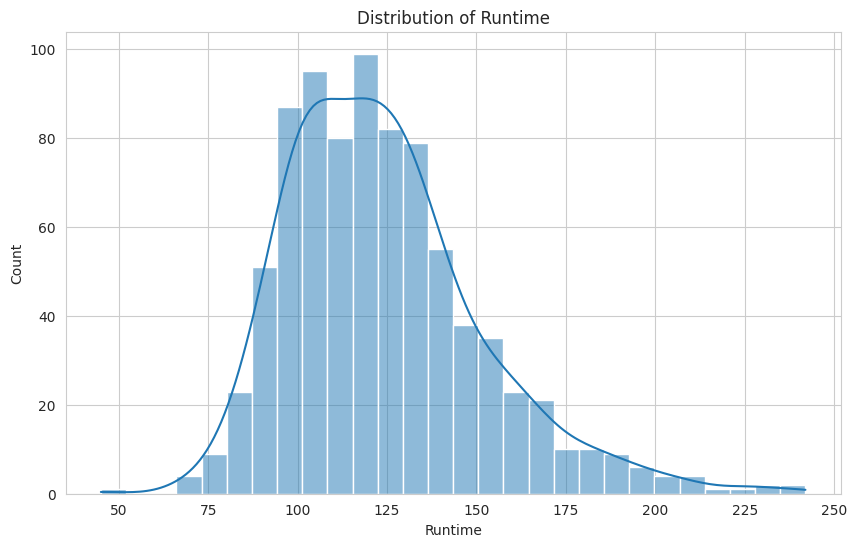

In [21]:
sns.histplot(df['Runtime'], kde=True)
plt.title('Distribution of Runtime')
plt.show()

It looks like most movies are in range of runtime of 1 hour 30 minute and 2 hours few minutes. It looks like its more normal or accepted for top 1000 movies to be very long runtime(like how there is 3 hour movies here) than very short(smaller tail on left side of this graph)

Now most interesting one out of the three, the Gross Histogram

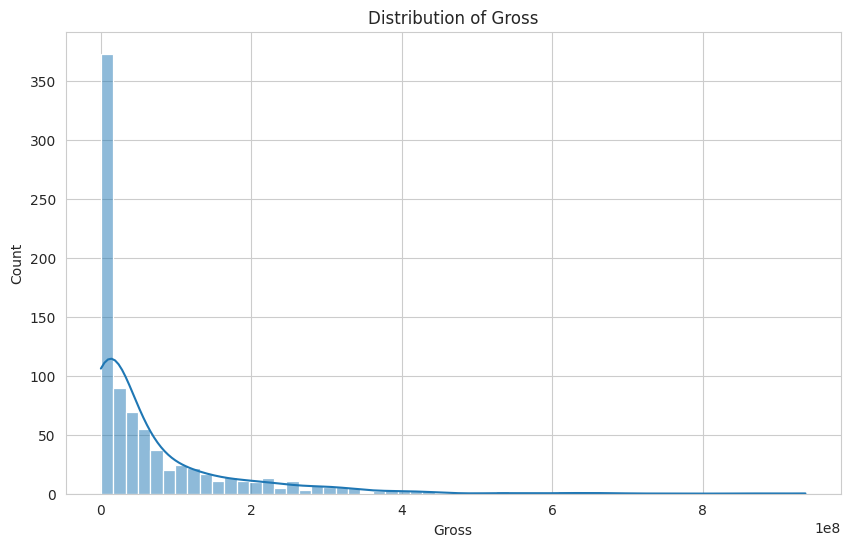

In [22]:
sns.histplot(df['Gross'], kde=True)
plt.title('Distribution of Gross')
plt.show()

After a few google search on graphs shaped like this, it looks like this follows a power law. Most movies earn little but very few movies become blockbusters.

Lets look at which movies are blockbusters

In [23]:
top_earners = df.sort_values(by='Gross', ascending=False).head(10)
top_earners[['Series_Title', 'Released_Year', 'Gross']]

,Series_Title,Released_Year,Gross
388,Star Wars: Episode VII - The Force Awakens,2015,936662225.0
52,Avengers: Endgame,2019,858373000.0
508,Avatar,2009,760507625.0
53,Avengers: Infinity War,2018,678815482.0
536,Titanic,1997,659325379.0
291,The Avengers,2012,623279547.0
733,Incredibles 2,2018,608581744.0
2,The Dark Knight,2008,534858444.0
472,Rogue One,2016,532177324.0
56,The Dark Knight Rises,2012,448139099.0


These are all very popular movies. It also looks like most movies in this most earning top 10 are action, fantasy or drama ones like titanic. we should investigate these further down by grouping movies by genre.

It would be easier to read if the gross was in millions instead of like above. So for future convenience, let's create a new column for gross in millions

In [26]:
df['Gross_Millions'] = df['Gross'] / 1000000

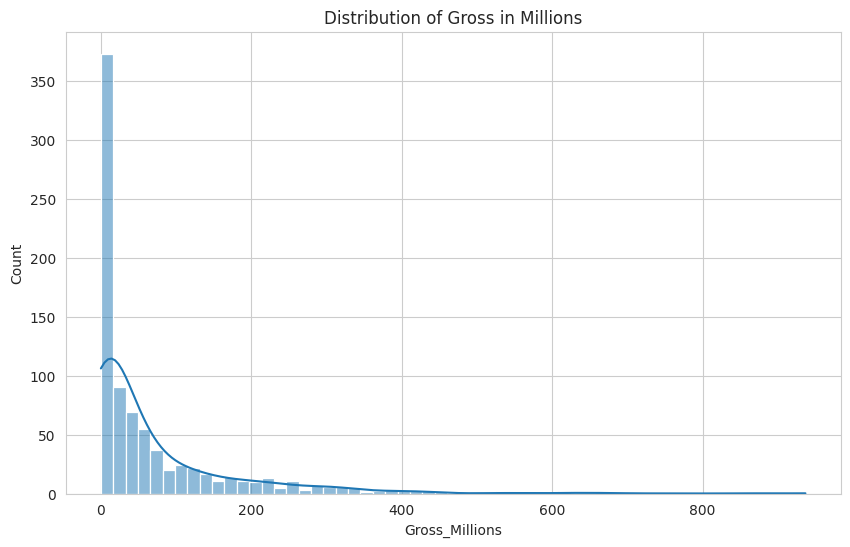

In [28]:
sns.histplot(df['Gross_Millions'], kde=True)
plt.title('Distribution of Gross in Millions')
plt.show()

This graph looks easier to understand than prevous